In [3]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [113]:
data = pd.read_csv("/Users/James/Desktop/projects/countries/countries.csv",usecols=[i for i in range(1,15)])
data.head(5)

,Country,Quality of Life,Purchasing Power,Safety,Healthcare,Cost of Living,Property Price to Income,Traffic Commute Time,Pollution,Climate,Crime,Population Density,GDP per capita,Happiness
0,Switzerland,188.36,102.77,78.38,74.08,125.02,8.18,28.67,19.86,80.05,21.62,218.566896,71352.35260,7.560
1,Denmark,186.25,86.43,73.78,79.79,88.53,7.00,28.69,21.29,81.80,26.22,145.785100,60398.45334,7.646
2,Netherlands,180.27,76.65,72.84,75.28,78.93,7.28,27.64,25.39,87.00,27.16,518.002346,59228.83495,7.449
3,Finland,178.95,80.11,72.41,76.19,76.35,8.57,28.91,11.99,56.64,27.59,18.197944,51089.78533,7.809
4,Australia,178.41,91.07,56.97,77.86,80.75,7.27,34.81,23.69,92.70,43.03,3.339440,52518.32448,7.223


In [114]:
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Country,Quality of Life,Purchasing Power,Safety,Healthcare,Cost of Living,Property Price to Income,Traffic Commute Time,Pollution,Climate,Crime,Population Density,GDP per capita,Happiness
0,Taiwan,138.50,51.09,84.54,86.38,64.93,21.78,31.41,62.98,81.60,15.46,673.000000,50500.000000,6.455
1,Indonesia,90.15,19.01,54.07,60.52,35.95,21.52,43.28,67.15,68.48,45.93,145.683544,12073.461510,5.286
2,Austria,176.36,68.69,74.46,76.98,74.87,10.91,25.67,20.42,77.15,25.54,108.061137,55097.461230,7.294
3,China,103.16,53.62,69.86,66.16,41.31,27.89,40.56,81.17,80.21,30.14,148.769889,17311.997920,5.124
4,Philippines,78.12,18.00,57.54,67.19,39.11,30.20,43.65,73.69,61.03,42.46,367.512107,8390.353144,6.006


In [115]:
data.dtypes

Country                      object
Quality of Life             float64
Purchasing Power            float64
Safety                      float64
Healthcare                  float64
Cost of Living              float64
Property Price to Income    float64
Traffic Commute Time        float64
Pollution                   float64
Climate                     float64
Crime                       float64
Population Density          float64
GDP per capita              float64
Happiness                   float64
dtype: object

In [116]:
frac = 0.7

In [117]:
x, test_x = data.iloc[:,2:13][:round(len(data)*frac)],data.iloc[:,2:13][round(len(data)*frac):]
x.head(5)


,Purchasing Power,Safety,Healthcare,Cost of Living,Property Price to Income,Traffic Commute Time,Pollution,Climate,Crime,Population Density,GDP per capita
0,51.09,84.54,86.38,64.93,21.78,31.41,62.98,81.60,15.46,673.000000,50500.000000
1,19.01,54.07,60.52,35.95,21.52,43.28,67.15,68.48,45.93,145.683544,12073.461510
2,68.69,74.46,76.98,74.87,10.91,25.67,20.42,77.15,25.54,108.061137,55097.461230
3,53.62,69.86,66.16,41.31,27.89,40.56,81.17,80.21,30.14,148.769889,17311.997920
4,18.00,57.54,67.19,39.11,30.20,43.65,73.69,61.03,42.46,367.512107,8390.353144


In [118]:
y, test_y = data.iloc[:,13][:round(len(data)*frac)],data.iloc[:,13][round(len(data)*frac):]
y.head(5)

0    6.455
1    5.286
2    7.294
3    5.124
4    6.006
Name: Happiness, dtype: float64

### Decision Tree regression

In [169]:
clf = tree.DecisionTreeRegressor(max_depth=4,min_impurity_decrease=0.01)
clf = clf.fit(x,y)

In [170]:
pred = clf.predict(test_x)
pred[:10]

array([7.25078571, 6.139     , 5.6237    , 7.25078571, 4.49575   ,
       6.10336364, 5.6237    , 7.25078571, 5.6237    , 7.25078571])

In [171]:
act = np.array(test_y)
act[:10]

array([7.488, 6.102, 5.165, 6.377, 4.724, 5.515, 4.561, 6.664, 5.353,
       7.449])

In [172]:
np.sum(np.abs(act-pred)<=0.1*pred)/len(test_y)

0.6666666666666666

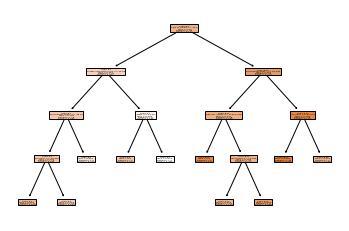

In [173]:
import matplotlib.pyplot as plt
plt.figure()
tree.plot_tree(clf,feature_names=x.columns,filled=True,node_ids=True)
plt.savefig('tree.eps',format='eps',bbox_inches = "tight")

In [174]:
x.columns.tolist()

['Purchasing Power',
 'Safety',
 'Healthcare',
 'Cost of Living',
 'Property Price to Income',
 'Traffic Commute Time',
 'Pollution',
 'Climate',
 'Crime',
 'Population Density',
 'GDP per capita']

In [175]:
#Finding all split nodes and their split rules
def output_table_of_split_rules(tree, x_variables):
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right
    feature = tree.feature
    threshold = tree.threshold
    
    node_depth = np.zeros(shape=n_nodes,dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes,dtype=bool)
    stack = [(0,0)] #start with node 0, depth 0
    
    while len(stack)>0:
        #pop current node
        node_id, depth = stack.pop()
        node_depth[node_id] = depth
        #if left child not equal to right child, we have a split node
        is_split_node = children_left[node_id] != children_right[node_id]
        #if split node, append left and right children and depth to 'stack'
        #to loop through the whole tree
        if is_split_node:
            stack.append((children_left[node_id],depth+1))
            stack.append((children_right[node_id],depth+1))
        else:
            is_leaves[node_id] = True
    print("This decision tree has {} nodes".format(n_nodes))
    node_ids = []
    variables = []
    thresholds = []
    for i in range(n_nodes):
        if is_leaves[i]:
            print("Node {} is a leaf node".format(i))
            print("Mse in this leaf node is {}".format(tree.impurity[i]))
        else:
            print("Node {node} is a split node, go to node {left} if {feature} <= {threshold}; else go to node{right}".format(node=i,left=children_left[i],feature=x_variables[feature[i]],threshold=threshold[i],right=children_right[i]))
            node_ids.append(i)
            variables.append(x_variables[feature[i]])
            thresholds.append(threshold[i])
    df = pd.DataFrame(node_ids, columns = ["Split nodes"])
    df["variables"] = variables
    df["thresholds"] = thresholds
    
    
    return df
output_table_of_split_rules(clf.tree_, x.columns.tolist())

This decision tree has 19 nodes
Node 0 is a split node, go to node 1 if Cost of Living <= 45.39999961853027; else go to node10
Node 1 is a split node, go to node 2 if Traffic Commute Time <= 45.88999938964844; else go to node7
Node 2 is a split node, go to node 3 if Purchasing Power <= 48.760000228881836; else go to node6
Node 3 is a split node, go to node 4 if Pollution <= 59.845001220703125; else go to node5
Node 4 is a leaf node
Mse in this leaf node is 0.023394222222229644
Node 5 is a leaf node
Mse in this leaf node is 0.1178534099999844
Node 6 is a leaf node
Mse in this leaf node is 0.05428888888883421
Node 7 is a split node, go to node 8 if Safety <= 34.689998626708984; else go to node9
Node 8 is a leaf node
Mse in this leaf node is 0.0
Node 9 is a leaf node
Mse in this leaf node is 0.07303268749999958
Node 10 is a split node, go to node 11 if Purchasing Power <= 62.20500183105469; else go to node16
Node 11 is a split node, go to node 12 if GDP per capita <= 21913.4384765625; els

,Split nodes,variables,thresholds
0,0,Cost of Living,45.400000
1,1,Traffic Commute Time,45.889999
2,2,Purchasing Power,48.760000
3,3,Pollution,59.845001
4,7,Safety,34.689999
5,10,Purchasing Power,62.205002
6,11,GDP per capita,21913.438477
7,13,Healthcare,74.035000
8,16,Pollution,60.275000


In [176]:
#Finding the return path from beginning node to ending node
def hasPath(tree, root, arr, x):
    """tree: sklearn decision tree
    root: id of beginning node
    arr = []
    x = id of ending node"""
    if tree.children_left[root] == -1 and root != x:
        return False
    arr.append(root)
    if root == x:
        return True
    if (hasPath(tree, tree.children_left[root], arr, x) or hasPath(tree, tree.children_right[root], arr, x)):
        return True
    arr.pop(-1)
    return False

#print path from one node to other, return "no path" if not found
def ReturnPath(tree, root, x, x_variables):
    arr = []
    path_str = ""
    if hasPath(tree, root, arr, x):
        j = 0
        for i in arr[:-1]:
            #print(i)
            #print(arr[i], end="->")
            if tree.children_left[i]==arr[j+1]:
                path_str = path_str + "{} <= {} ".format(x_variables[tree.feature[i]], tree.threshold[i])
            else:
                path_str = path_str + "{} > {} ".format(x_variables[tree.feature[i]], tree.threshold[i])
            j += 1
            
    else:
        print("no path")
    return path_str
                
ReturnPath(clf.tree_, 0, 14, x.columns.tolist())
                
                

'Cost of Living > 45.39999961853027 Purchasing Power <= 62.20500183105469 GDP per capita > 21913.4384765625 Healthcare <= 74.03499984741211 '

In [177]:
#Finding the decision path of samples
def get_path(model, x, x_variables):
    #path is a sparse matrix
    path = model.decision_path(x)
    leaf_id = model.apply(x)
    feature = model.tree_.feature
    threshold = model.tree_.threshold
    
    paths = []
    for sample_id in range(len(x)):
        #ids of nodes sample i goes through, e.g. [0,5,9,14]
        node_index = path.indices[path.indptr[sample_id]:path.indptr[sample_id+1]]
        
        path_str = ""
        for i in node_index:
            if i == leaf_id[sample_id]:
                pass
            else:
                if x.iloc[sample_id][x_variables[feature[i]]]<= threshold[i]:
                    path_str = path_str + "{} <= {} ".format(x_variables[feature[i]],threshold[i])
                else:
                    path_str = path_str + "{} > {} ".format(x_variables[feature[i]],threshold[i])
                
        paths.append(path_str)
        
    df = pd.DataFrame(paths, columns=["Paths"])
    return df

get_path(clf, test_x,  x.columns.tolist())

,Paths
0,Cost of Living > 45.39999961853027 Purchasing ...
1,Cost of Living > 45.39999961853027 Purchasing ...
2,Cost of Living <= 45.39999961853027 Traffic Co...
3,Cost of Living > 45.39999961853027 Purchasing ...
4,Cost of Living <= 45.39999961853027 Traffic Co...
5,Cost of Living > 45.39999961853027 Purchasing ...
6,Cost of Living <= 45.39999961853027 Traffic Co...
7,Cost of Living > 45.39999961853027 Purchasing ...
8,Cost of Living <= 45.39999961853027 Traffic Co...
9,Cost of Living > 45.39999961853027 Purchasing ...


In [195]:
#UK
a = get_path(clf, data[data["Country"]=="United Kingdom"].iloc[:,2:13],  x.columns.tolist())
a.to_csv("hk.csv")
clf.predict(data[data["Country"]=="United Kingdom"].iloc[:,2:13])

array([7.25078571])

In [185]:
results = pd.DataFrame(get_path(clf, test_x,  x.columns.tolist()))
results["Countries"] = data.iloc[:,0][round(len(data)*frac):].tolist()
results["Predictions"] = clf.predict(test_x)
results["Actual"] = np.array(test_y)
results
#results.to_csv("results.csv")

,Paths,Countries,Predictions,Actual
0,Cost of Living > 45.39999961853027 Purchasing ...,Norway,7.250786,7.488
1,Cost of Living > 45.39999961853027 Purchasing ...,Kuwait,6.139000,6.102
2,Cost of Living <= 45.39999961853027 Traffic Co...,Azerbaijan,5.623700,5.165
3,Cost of Living > 45.39999961853027 Purchasing ...,Singapore,7.250786,6.377
4,Cost of Living <= 45.39999961853027 Traffic Co...,Nigeria,4.495750,4.724
5,Cost of Living > 45.39999961853027 Purchasing ...,Greece,6.103364,5.515
6,Cost of Living <= 45.39999961853027 Traffic Co...,Ukraine,5.623700,4.561
7,Cost of Living > 45.39999961853027 Purchasing ...,France,7.250786,6.664
8,Cost of Living <= 45.39999961853027 Traffic Co...,Vietnam,5.623700,5.353
9,Cost of Living > 45.39999961853027 Purchasing ...,Netherlands,7.250786,7.449


### Linear Regression

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_x = scaler.fit_transform(x)
std_test_x = scaler.transform(test_x)

reg = LinearRegression(normalize=True,fit_intercept=True).fit(std_x, y)

In [180]:
import statsmodels.api as sm
X = sm.add_constant(std_x)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     12.25
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           8.97e-10
Time:                        18:32:21   Log-Likelihood:                -32.417
No. Observations:                  55   AIC:                             86.83
Df Residuals:                      44   BIC:                             108.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1771      0.066     93.924      0.0

In [183]:
pred = reg.predict(std_test_x)
print("predictions: {}".format(pred[:5]))
act = np.array(test_y)
print("actual: {}".format(act[:5]))
print("countries: {}".format(np.array(data.iloc[round(len(data)*frac):round(len(data)*frac)+5,0])))

predictions: [7.7752642  5.83902477 4.98911246 7.07701479 5.26750101]
actual: [7.488 6.102 5.165 6.377 4.724]
countries: ['Norway' 'Kuwait' 'Azerbaijan' 'Singapore' 'Nigeria']


In [182]:
np.sum(np.abs(act-pred)<=0.1*pred)/len(test_y)

0.6666666666666666

In [80]:
reg.coef_

array([-0.18660754, -0.06899562,  0.17062704,  0.4996305 , -0.18855761,
       -0.09581095, -0.31642462, -0.05122813])

In [65]:
x.columns

Index(['Purchasing Power', 'Safety', 'Healthcare', 'Cost of Living',
       'Property Price to Income', 'Traffic Commute Time', 'Pollution',
       'Climate'],
      dtype='object')

In [81]:
reg.intercept_

6.119472727272727